**Brian Blaylock**  
*February 19, 2021*

# 🗺 Add common features to your maps with `cartopy_tools`
When I first learned cartopy, it was difficult to know how to add things to a map. Now that I am more experienced, I know what I like to put on my maps to build the baselayer. Instead of recoding all these tasks of adding different features, I simplified and put all these feature layers into a function. Now I can create a cartopy axes and add different features to it (or add features to an existing cartopy axes.

One common line I dislike typing so much is `ccrs.PlateCarree()`. Lucky for you, this value is stored in the variable `pc` in cartopy_tools and can be imported.

In [1]:
import matplotlib.pyplot as plt

from toolbox.cartopy_tools import common_features, pc, ccrs

## 🐰 Quickly create a Cartopy axes, add features, and change feature style

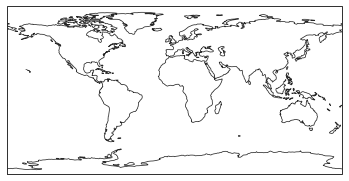

In [2]:
ax = common_features()

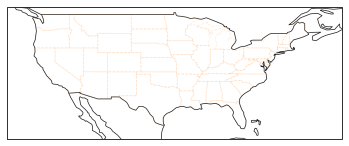

In [3]:
# Add STATES feature, and adjust the display arguments
ax = common_features(BORDERS=True, STATES=True, STATES_kwargs=dict(edgecolor='tab:orange', linestyle='--'))
ax.set_extent([-130, -60, 23, 45])

You can even specify the projection, and then plot things on the returned axes.

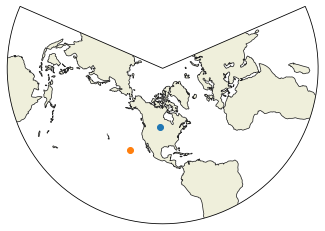

In [4]:
# LambertConformal Projection
ax = common_features(crs=ccrs.LambertConformal(), LAND=True)

# Add single points
ax.scatter(-100, 50, transform=pc)
ax.scatter(-130, 20, transform=pc)

ax.set_global()

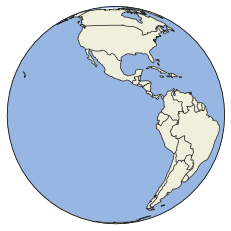

In [5]:
# Geostationary Projection
ax = common_features(BORDERS=True, OCEAN=True, LAND=True, crs=ccrs.Geostationary(central_longitude=-100))

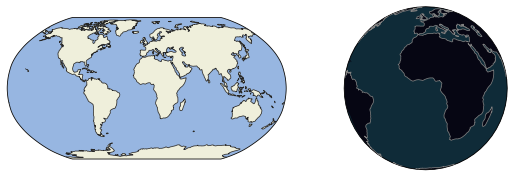

In [6]:
# There is even a dark themed map!

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Robinson())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Geostationary())

common_features(ax=ax1, OCEAN=True, LAND=True)
common_features(ax=ax2, OCEAN=True, LAND=True, dark=True)

plt.subplots_adjust(wspace=0)

## 📚 Summary of `common_features`
By default, `COASTLINES=True` to always plot coastlines, but you can set that to False if it's not needed.

<div class="alert alert-info">
Note: You may change the Stamen zoom level in the <i>STAMEN_kwargs</i>.
</div>


In [7]:
a = [
    {'COASTLINES':True},
    {'BORDERS':True},
    {'STATES':True},
    {'COUNTIES':True},
    {'OCEAN':True},
    {'LAND':True},
    {'RIVERS':True},
    {'LAKES':True},
    {'ROADS':True},
    {'STAMEN':True},   
]

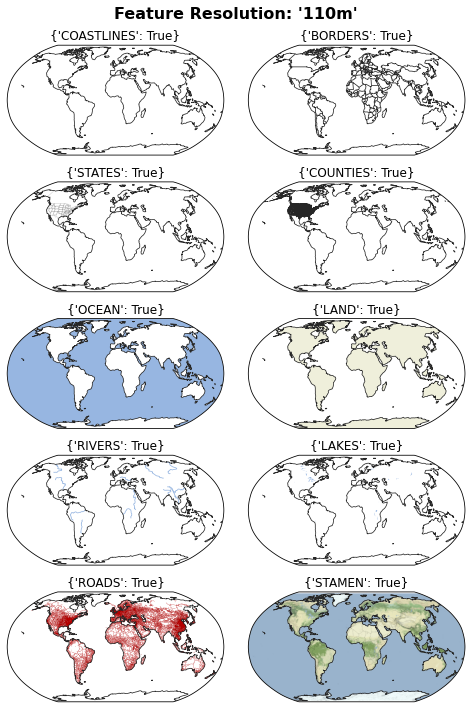

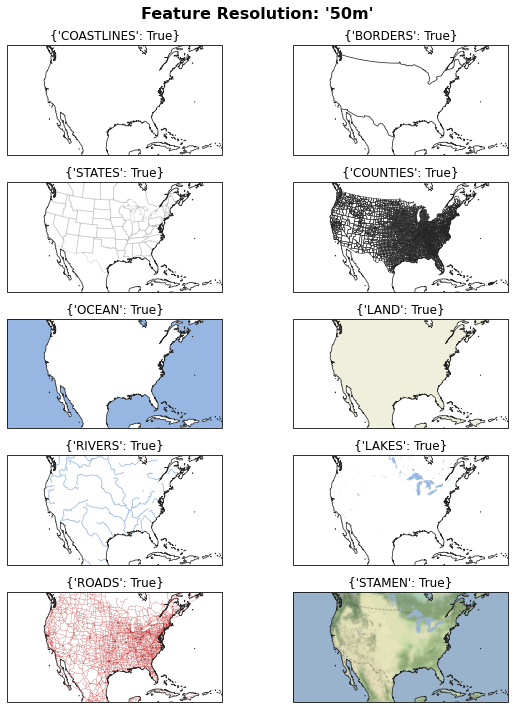

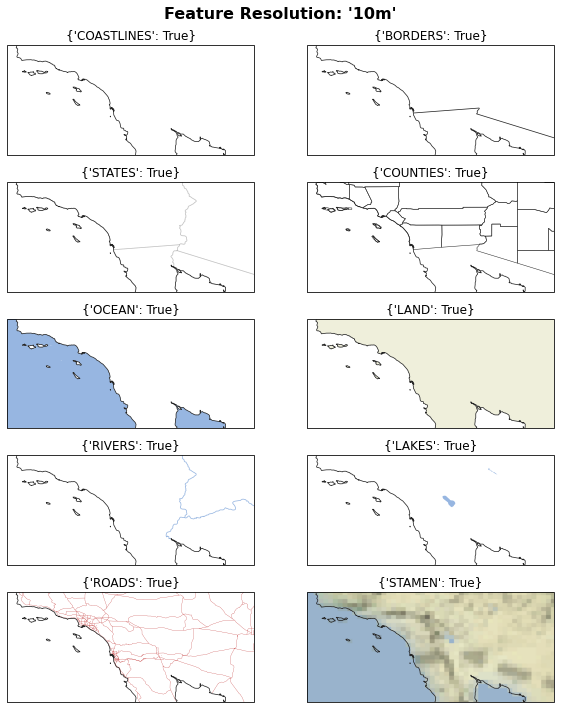

In [8]:
for res, crs in zip(['110m', '50m', '10m'], [ccrs.Robinson(), ccrs.LambertConformal(), pc]):
    plt.figure(figsize=(10,10))
    for i, feature in enumerate(a, 1):
        nrows = int(len(a)/2)
        ax = plt.subplot(nrows, 2, i, projection=crs)
        
        common_features(res, **feature, ax=ax)
        
        if res == '50m':
            ax.set_extent([-130, -60, 20, 50], ccrs.PlateCarree())
        elif res == '10m':
            ax.set_extent([-121, -112, 31, 35], ccrs.PlateCarree())
            
        ax.set_title(feature)

    plt.suptitle(f"Feature Resolution: '{res}'",
                 fontsize=16, ha='center',
                 fontweight='semibold')
    plt.subplots_adjust(wspace=-.26)
    plt.tight_layout()
    plt.savefig(f'../images/features_summary_{res}', bbox_inches='tight')

## 🌓 Light and Dark themed maps

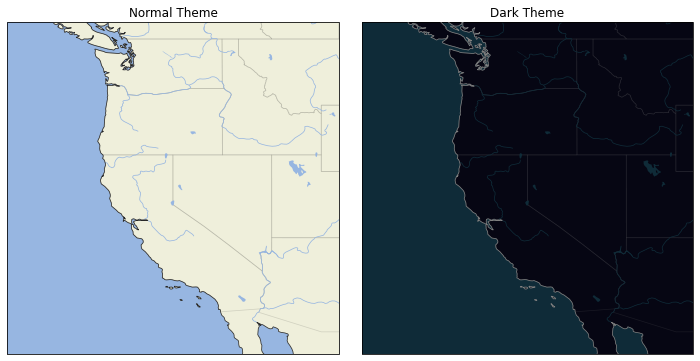

In [9]:
add_features = dict(
    COASTLINES=True,
    OCEAN=True,
    LAND=True,
    STATES=True,
    RIVERS=True,
    LAKES=True
)


fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': pc}, figsize=[10,5])

for ax in (ax1, ax2):
    ax.set_extent([-130, -110, 30, 50])

common_features('50m', ax=ax1, **add_features)
ax1.set_title('Normal Theme')


common_features('50m', ax=ax2, dark=True, **add_features)
ax2.set_title('Dark Theme')

plt.tight_layout()
plt.savefig(f'../images/light-dark', bbox_inches='tight')

## 🛣 Roads
All major roads, from the Natural Earth feature

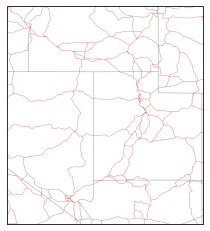

In [10]:
ax = common_features(STATES=True, ROADS=True)
ax.set_extent([-118, -109, 35, 45])

You may separate by road type

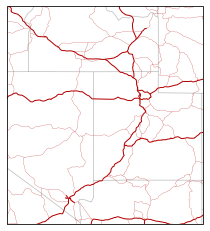

In [11]:
ax = common_features(STATES=True, 
                     ROADS=True, ROADS_kwargs=dict(type=['Major Highway'], linewidth=1))

common_features(ax=ax, 
                ROADS=True, ROADS_kwargs=dict(type=['Secondary Highway']))

ax.set_extent([-118, -109, 35, 45])

# ⏹ Modify the map extent

In [12]:
from toolbox.cartopy_tools import center_extent, adjust_extent, copy_extent

## Center Extent
When you create a map, it shows the global extent

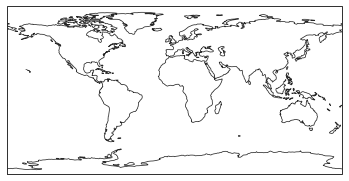

In [13]:
ax = common_features()

you can center the map at a point with `center_extent`

(-124.99999999999999, -115.0, 35.0, 45.0)

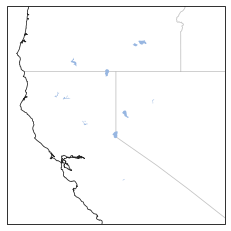

In [30]:
ax = common_features('10m', STATES=True, LAKES=True)
center_extent(lat=40, lon=-120)

(-121.5, -118.49999999999999, 38.5, 41.5)

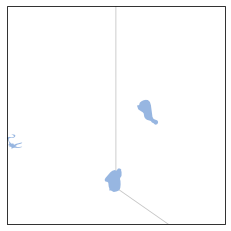

In [33]:
ax = common_features('10m', STATES=True, LAKES=True)
center_extent(lat=40, lon=-120, pad=1.5)   # Adjust the padding to zoom in or out.

You may also adjust the extent with `adjust_extent`. This is useful if cartopy has auto zoomed on an area after you plotted a point. The pad amount is in the crs coordinates. For PlateCarree this is in degrees. 

(-115.49999999999999, -84.5, 27.799999999999997, 52.2)

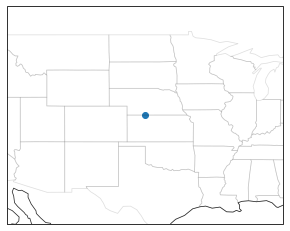

In [38]:
ax = common_features(STATES=True)
ax.scatter(-100, 40)
adjust_extent(pad=10)

(-115.49999999999999, -84.5, 37.25, 42.75)

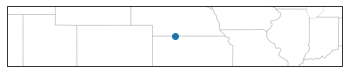

In [39]:
ax = common_features(STATES=True)
ax.scatter(-100, 40)
adjust_extent(pad=dict(left=10, right=10))

You can also copy an extent to another map

(-124.99999999999999, -115.0, 35.0, 45.0)

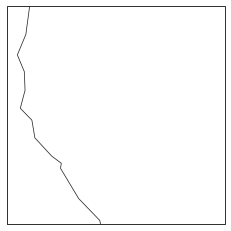

In [45]:
# Create an initial map and adjust the extent
ax1 = common_features()
center_extent(lat=40, lon=-120)

(-124.99999999999999, -115.0, 35.0, 45.0)

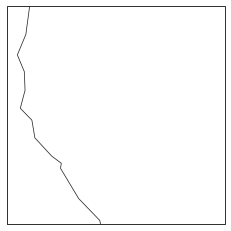

In [44]:
#copy the extent from ax1 to ax2

ax2 = common_features()
copy_extent(ax1, ax2)

# 🔲 Domain Border
Add a domain border with `domain_border` from an xarray Dataset that has `latitude` and `longitude` coordinates. The x and y values must be 2D arrays of the grid you want to plot. This is useful for showing the extent of a model domain.

In [47]:
from hrrrb.archive import xhrrr
from toolbox.cartopy_tools import domain_border

In [48]:
# Get some HRRR model
h = xhrrr('2021-04-02', 'TMP:2 m')

💡 Info: Downloading [1] GRIB2 files

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/hrrr/20210402]
Download subset from [nomads]:
✅ Success! Searched for [TMP:2 m] and got [1] GRIB fields and saved as /p/cwfs/blaylock/data/hrrr/20210402/subset_20210402_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:02.785528


(<cartopy.mpl.feature_artist.FeatureArtist at 0x2b5a7de7d100>,
 <shapely.geometry.polygon.Polygon at 0x2b5a7de69af0>)

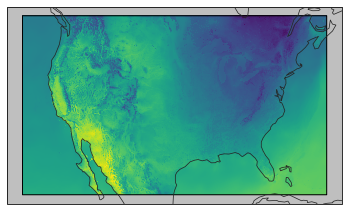

In [60]:
ax = common_features(crs=h.crs)

ax.pcolormesh(h.longitude, h.latitude, h.t2m, transform=pc)

domain_border(h)